# Young people are not sufficiently physically active, putting their current and future health at risk

## Is there any difference between gender? 

In [1]:
# import pandas and numpy for data manipulation and exploratory data analysis (set up for complete view on data)
import pandas as pd
pd.set_option('max_columns', 151)
pd.set_option('display.max_rows', None)
import numpy as np

# importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing scipy for hypothesis testing
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

In [2]:
# importing data
data = pd.read_csv('responses.csv')

In [3]:
# first overview
data.head(10)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [4]:
# get an overview of the datasize -> 150 columns and 1010 rows
data.shape

(1010, 150)

### Filter by age (15-25)

In [5]:
# only interested in age equal or under 25
data = data[(data['Age']<=25)]

In [6]:
# check for the different size of the new dataset (74 Individuals less)
data.shape

(936, 150)

In [7]:
# before starting the analysis get summary of the data - what is the sample about what are main chracteristics
data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,933.000000,934.000000,932.000000,931.000000,931.000000,929.000000,934.000000,933.000000,930.000000,933.000000,928.000000,932.000000,929.000000,930.000000,929.000000,929.000000,928.000000,929.000000,935.000000,931.000000,934.000000,935.000000,933.000000,933.000000,935.000000,934.000000,933.000000,933.000000,928.000000,932.000000,934.000000,934.000000,932.000000,935.000000,933.000000,933.000000,933.000000,931.000000,933.000000,930.000000,928.000000,931.000000,928.000000,931.000000,933.000000,935.000000,932.000000,932.00000,933.000000,930.000000,933.000000,935.000000,931.000000,923.00000,933.000000,930.000000,934.000000,934.000000,930.000000,929.000000,934.000000,933.000000,933.000000,933.000000,935.000000,934.000000,934.000000,932.000000,936.000000,933.000000,935.000000,935.000000,936.000000,933.000000,929.000000,933.000000,933.000000,932.000000,934.000000,930.000000,932.000000,935.000000,933.000000,931.000000,932.000000,935.000000,930.000000,932.000000,933.000000,931.00000,932.000000,933.000000,931.000000,936.000000,932.000000,930.000000,936.000000,935.000000,932.000000,935.000000,934.000000,934.000000,936.000000,933.000000,936.000000,933.000000,936.000000,932.000000,935.000000,932.000000,934.000000,930.000000,932.000000,934.000000,934.000000,935.000000,934.000000,933.000000,934.000000,933.000000,932.000000,932.000000,932.000000,932.000000,932.000000,933.000000,934.000000,933.000000,934.000000,934.000000,935.000000,933.000000,934.000000,936.000000,934.000000,936.000000,921.000000,920.000000,934.000000
mean,4.743837,3.338330,3.125536,2.270677,2.119227,2.947255,2.761242,3.475884,3.777419,2.362272,2.466595,2.934549,2.772874,2.775269,3.146394,2.844995,2.828664,2.353068,2.113369,4.621912,2.791221,3.361497,4.509110,3.489818,3.125134,3.146681,3.764202,3.825295,3.623922,2.106223,3.547109,3.190578,3.142704,2.595722,2.309753,2.027867,4.175777,3.104189,2.633441,2.667742,2.179957,3.163265,3.068966,3.806660,2.505895,2.241711,2.677039,2.57618,2.250804,3.670968,2.448017,2.306952,1.885070,3.40520,3.279743,1.872043,2.355460,3.292291,3.213978,3.013994,4.572805,2.968917,3.349411,2.041801,1.952941,2.245182,2.605996,2.826180,3.016026,2.386924,2.558289,3.028877,2.811966,3.026795,3.053821,2.602358,3.041801,2.969957,3.395075,2.

In [8]:
# It is helpful to know which columns have missing data
dsnull = data.isnull().sum().sort_values(ascending=False)
print(dsnull)

Weight                            16
Height                            15
Passive sport                     13
Geography                          8
Chemistry                          8
Documentary                        8
Punk                               8
Latino                             8
Daily events                       7
Theatre                            7
Reggae, Ska                        7
Rock n roll                        7
Alternative                        7
Techno, Trance                     7
Classical music                    7
Smoking                            7
Gardening                          6
Science and technology             6
Compassion to animals              6
Responding to a serious letter     6
Biology                            6
Rock                               6
Criminal damage                    6
Final judgement                    6
Swing, Jazz                        6
Countryside, outdoors              6
Self-criticism                     5
W

In [9]:
# amount of missing values is not that high - missing values dropped
#data = data.dropna() 
#data = data.fillna(0)
data.shape # 634 remaining Individuals

(936, 150)

### Individuals by gender in dataset 

In [10]:
# gender variable ->, how is the data spread across male and female
data.Gender.value_counts()

female    556
male      376
Name: Gender, dtype: int64

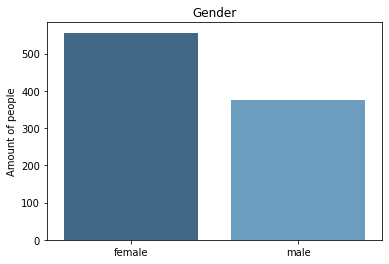

In [11]:
sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values, palette ='Blues_d')
plt.title('Gender')
plt.ylabel('Amount of people')
plt.show()

### Individuals by age in dataset 

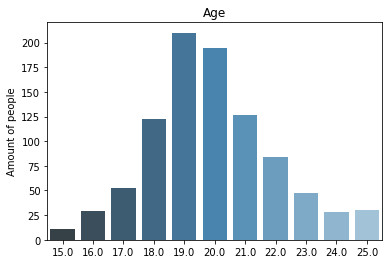

In [12]:
sns.barplot(x=data['Age'].value_counts().index,y=data['Age'].value_counts().values, palette ='Blues_d')
plt.title('Age')
plt.ylabel('Amount of people')
plt.show()

# Hobbies and Interests
### What are young people interested in?
#### Frequency of activities preferences (most important-mode) 
#### Not interested 1-2-3-4-5 Very interested (integer)

In [13]:
# Find the column number of History, it's the beginning of section: Hobbies & interests 
# Find the column number of Pets, it's the last column of section: Hobbies & interests 
print(data.columns.get_loc('History'))
print(data.columns.get_loc('Pets'))
print(data.columns.get_loc('Gender'))
print(data.columns.get_loc('Age'))

31
62
144
140


In [14]:
# selecting columns from Hobbies & interests section
hobbies_interests = list(data.columns[31:63]) 
hobbies_interests.append(data.columns[140])
hobbies_interests.append(data.columns[144])
data_hobbies_interest = data[hobbies_interests]
data_hobbies_interest

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Age,Gender
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,20.0,female
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,19.0,female
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,20.0,female
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,22.0,female
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,20.0,female
5,5.0,3.0,4.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,5.0,2.0,2.0,5.0,1.0,5.0,1.0,5.0,4.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,2.0,20.0,male
6,3.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,5.0,5.0,3.0,3.0,4.0,5.0,3.0,4.0,1.0,1.0,4.0,3.0,2.0,1.0,5.0,3.0,3.0,1.0,3.0,4.0,3.0,5.0,1.0,5.0,20.0,female
7,5.0,2.0,3.0,1.0,1.0,5.0,4.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,1.0,3.0,3.0,2.0,2.0,4.0,2.0,5.0,19.0,male
8,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,1.0,5.0,4.0,1.0,1.0,18.0,female
9,3.0,2.0,3.0,3.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,5.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0,3.0,1.0,4.0,4.0,1.0,2.0,4.0,3.0,5.0,5.0,2.0,2.0,19.0,female


In [15]:
# getting a first overview about the favorite Hobbies and Interest 
data_hobbies_interest.describe()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Age
count,934.000000,932.000000,935.000000,933.000000,933.000000,933.000000,931.000000,933.000000,930.000000,928.000000,931.000000,928.000000,931.000000,933.000000,935.000000,932.000000,932.00000,933.000000,930.000000,933.000000,935.000000,931.000000,923.00000,933.000000,930.000000,934.000000,934.000000,930.000000,929.000000,934.000000,933.000000,933.000000,936.000000
mean,3.190578,3.142704,2.595722,2.309753,2.027867,4.175777,3.104189,2.633441,2.667742,2.179957,3.163265,3.068966,3.806660,2.505895,2.241711,2.677039,2.57618,2.250804,3.670968,2.448017,2.306952,1.885070,3.40520,3.279743,1.872043,2.355460,3.292291,3.213978,3.013994,4.572805,2.968917,3.349411,19.905983
std,1.273052,1.263390,1.296174,1.342393,1.200534,0.921356,1.325066,1.357951,1.390546,1.395380,1.500245,1.287893,1.126035,1.384005,1.241404,1.441218,1.31078,1.310781,1.196207,1.443770,1.513998,1.275367,1.40824,1.499638,1.148675,1.273856,1.290249,1.273400,1.322394,0.725104,1.411973,1.548255,2.066728
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,15.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.250000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.000000,1.000000,1.000000,1.000000,2.00000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,19.000000
50%,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.00000,2.000000,4.000000,2.000000,2.000000,1.000000,4.00000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,4.000000,20.000000
75%,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,3.000000,4.000000,3.00000,3.000000,5.000000,3.000000,4.000000,3.000000,5.00000,5.000000,2.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,21.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000


In [16]:
# generate a table with average ages and interests (average age = 20)
data_hobbies_mean_age = data_hobbies_interest.groupby('Age', as_index = False).mean()
data_hobbies_mean_age

,Age,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,15.0,2.181818,2.727273,1.727273,2.545455,1.727273,4.545455,3.818182,2.181818,2.909091,2.363636,2.636364,3.200000,3.636364,1.727273,2.000000,2.272727,2.454545,2.181818,3.181818,2.818182,3.181818,2.272727,3.400000,3.363636,2.090909,2.363636,3.636364,3.454545,2.818182,4.545455,3.090909,4.181818
1,16.0,3.000000,2.896552,1.931034,2.241379,1.931034,4.137931,2.740741,2.103448,2.758621,2.607143,3.448276,2.793103,3.620690,2.689655,1.965517,1.965517,2.482759,2.241379,3.793103,2.965517,2.862069,1.862069,3.428571,3.642857,2.535714,2.517241,3.793103,2.482759,2.758621,4.607143,3.172414,3.241379
2,17.0,3.207547,3.075472,2.415094,2.245283,2.075472,4.245283,3.019231,2.396226,2.924528,2.415094,2.962264,3.094340,3.830189,2.792453,2.358491,2.981132,2.528302,2.245283,3.886792,2.320755,2.226415,2.113208,3.075472,3.415094,2.018868,2.566038,3.490566,3.169811,2.653846,4.452830,3.169811,3.603774
3,18.0,3.154472,3.186992,2.819672,2.483607,1.991870,4.131148,3.024590,2.853659,2.669421,2.131148,3.447154,3.024390,3.975610,2.373984,2.439024,2.762295,2.552846,2.284553,3.537190,2.365854,2.333333,1.803279,3.429752,3.162602,1.682927,2.483607,3.508197,3.105691,3.219512,4.585366,2.910569,3.487805
4,19.0,3.057143,3.258373,2.457143,2.511962,2.081731,4.166667,3.080952,2.600000,2.831731,2.323810,3.162679,3.019417,3.985577,2.738095,2.138756,2.631579,2.595238,2.254808,3.609524,2.598086,2.266667,1.875000,3.442857,3.247619,1.757143,2.296651,3.224880,3.114833,3.009569,4.666667,2.947619,3.230769
5,20.0,3.222798,3.242268,2.592784,2.077320,1.927835,4.149485,2.963918,2.549223,2.687500,2.178947,3.192708,3.000000,3.766839,2.474227,2.154639,2.487047,2.575130,2.226804,3.614583,2.365979,2.314433,1.963542,3.463542,3.181347,1.858639,2.396907,3.283505,3.256545,3.020942,4.626943,2.849741,3.293814
6,21.0,3.275591,2.992063,2.527559,2.047244,1.842520,4.150794,3.000000,2.539683,2.582677,2.103175,3.103175,3.119048,3.692913,2.269841,2.078740,2.690476,2.685039,2.220472,3.740157,2.330709,2.354331,1.763780,3.256000,3.492063,1.833333,2.307087,3.377953,3.317460,3.150794,4.535433,3.119048,3.452381
7,22.0,3.180723,2.939759,2.630952,2.240964,2.095238,4.192771,3.345238,2.638554,2.345238,1.797619,2.939759,3.000000,3.566265,2.268293,2.357143,2.880952,2.650602,2.265060,3.785714,2.345238,2.240964,1.916667,3.567901,3.119048,1.891566,2.071429,2.857143,3.445783,2.880952,4.440476,2.785714,3.047619
8,23.0,3.468085,3.042553,2.914894,2.510638,2.521739,4.382979,3.638298,2.808511,2.361702,1.934783,3.106383,3.127660,3.702128,2.574468,2.553191,3.170213,2.630435,2.191489,3.489362,2.456522,2.234043,1.744681,3.456522,3.510638,1.872340,2.340426,3.021277,3.255319,2.978261,4.595745,3.260870,3.638298
9,24.0,3.392857,3.148148,3.000000,2.428571,1.892857,4.000000,3.285714,3.321429,2.500000,2.142857,3.071429,3.571429,3.814815,2.321429,2.214286,2.535714,2.259259,2.142857,4.178571,2.148148,2.142857,1.678571,3.678571,3.321429,2.464286,2.321429,3.142857,3.428571,2.892857,4.464286,3.000000,3.214286


## Is there a difference in age and being active in sport?

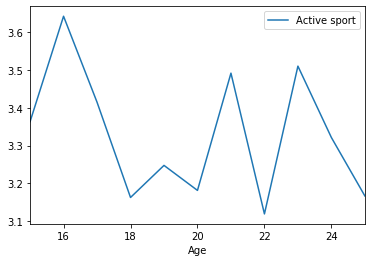

In [17]:
data_hobbies_mean_age.plot(x='Age', y ='Active sport')

## Is the a difference between male and female Individulas?  

[Text(0, 0, 'History'), Text(0, 0, 'Psychology'), Text(0, 0, 'Politics'), Text(0, 0, 'Mathematics'), Text(0, 0, 'Physics'), Text(0, 0, 'Internet'), Text(0, 0, 'PC'), Text(0, 0, 'Economy Management'), Text(0, 0, 'Biology'), Text(0, 0, 'Chemistry'), Text(0, 0, 'Reading'), Text(0, 0, 'Geography'), Text(0, 0, 'Foreign languages'), Text(0, 0, 'Medicine'), Text(0, 0, 'Law'), Text(0, 0, 'Cars'), Text(0, 0, 'Art exhibitions'), Text(0, 0, 'Religion'), Text(0, 0, 'Countryside, outdoors'), Text(0, 0, 'Dancing'), Text(0, 0, 'Musical instruments'), Text(0, 0, 'Writing'), Text(0, 0, 'Passive sport'), Text(0, 0, 'Active sport'), Text(0, 0, 'Gardening'), Text(0, 0, 'Celebrities'), Text(0, 0, 'Shopping'), Text(0, 0, 'Science and technology'), Text(0, 0, 'Theatre'), Text(0, 0, 'Fun with friends'), Text(0, 0, 'Adrenaline sports'), Text(0, 0, 'Pets')]


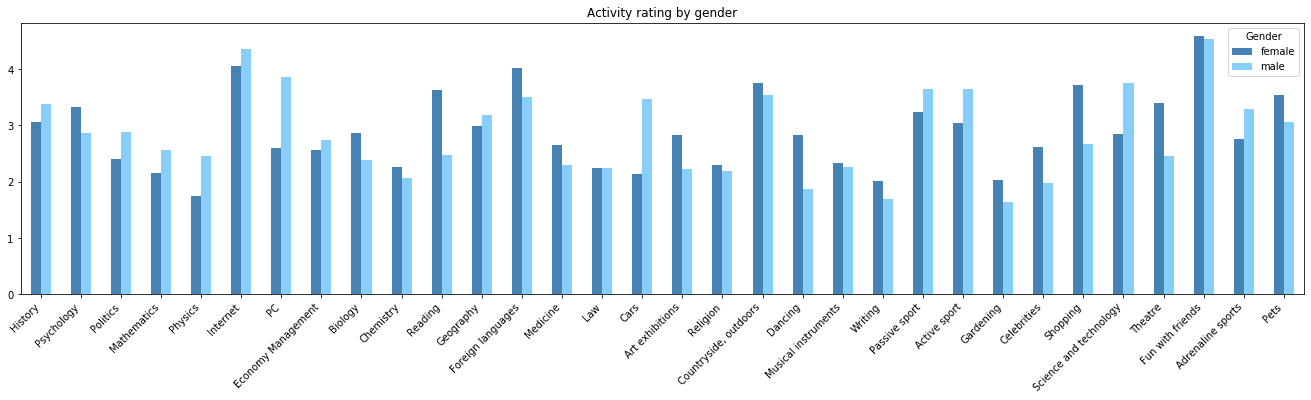

In [18]:
data_hobbies_gender = data_hobbies_interest.groupby('Gender', as_index = False).mean()
data_hobbies_gender = data_hobbies_gender.set_index('Gender')
data_hobbies_gender = data_hobbies_gender.T
data_hobbies_gender = data_hobbies_gender.drop(['Age'])
chart = data_hobbies_gender.plot(kind='bar', figsize=(23, 5), color=['steelblue', 'lightskyblue'])
plt.title('Activity rating by gender')
print(chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right'))

#### Dividing data female and male - what are the top activities?

#### Top 15 Activities (female) 

In [19]:
data_hobbies_female = data_hobbies_interest.loc[data_hobbies_interest.Gender == 'female']
data_hobbies_female = data_hobbies_female.drop(['Age'], axis=1)
data_hobbies_female = data_hobbies_female.mean().sort_values(ascending=False).head(15)
data_hobbies_female
# Rank 13: Active sport 3.000

Fun with friends          4.595668
Internet                  4.052441
Foreign languages         4.010811
Countryside, outdoors     3.761733
Shopping                  3.718919
Reading                   3.632911
Pets                      3.534296
Theatre                   3.391304
Psychology                3.332130
Passive sport             3.241316
History                   3.068592
Active sport              3.036101
Geography                 2.987319
Biology                   2.868231
Science and technology    2.847550
dtype: float64

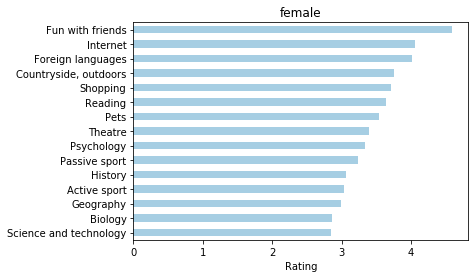

In [77]:
plt.title('female')
data_hobbies_female.plot(kind='barh', colormap='Paired')
plt.gca().invert_yaxis()
plt.xlabel('Rating')
plt.savefig('top_activity_f.png', bbox_inches = 'tight', transparent = True)

#### Top 15 Activities (male)  

In [21]:
data_hobbies_male = data_hobbies_interest.loc[data_hobbies_interest.Gender == 'male']
data_hobbies_male = data_hobbies_male.drop(['Age'], axis=1)
data_hobbies_male = data_hobbies_male.mean().sort_values(ascending=False).head(15)
data_hobbies_male
# Rank 6: Active sport 3.616

Fun with friends          4.539894
Internet                  4.359043
PC                        3.864000
Science and technology    3.757333
Passive sport             3.653226
Active sport              3.645333
Countryside, outdoors     3.541555
Foreign languages         3.502688
Cars                      3.470745
History                   3.380319
Adrenaline sports         3.294118
Geography                 3.190860
Pets                      3.066667
Politics                  2.888298
Psychology                2.863636
dtype: float64

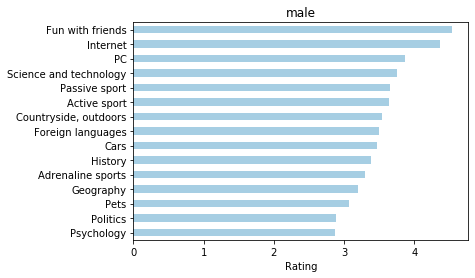

In [78]:
plt.title('male')
data_hobbies_male.plot(kind='barh', colormap='Paired')          
plt.gca().invert_yaxis()
plt.xlabel('Rating')
plt.savefig('top_activity_m.png', bbox_inches = 'tight', transparent = True)

## Interests table grouped by age and gender 

In [23]:
data_hobbies = data_hobbies_interest.groupby(['Age','Gender'], as_index = False).mean()
data_hobbies

,Age,Gender,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,15.0,female,2.000000,3.250000,1.625000,3.000000,1.875000,4.750000,3.750000,2.000000,3.000000,2.125000,3.125000,3.428571,3.875000,1.750000,2.125000,1.875000,3.000000,2.500000,3.500000,3.000000,3.375000,2.750000,3.250000,3.125000,2.500000,2.625000,4.000000,3.375000,3.500000,4.750000,3.125000,4.250000
1,15.0,male,2.666667,1.333333,2.000000,1.333333,1.333333,4.000000,4.000000,2.666667,2.666667,3.000000,1.333333,2.666667,3.000000,1.666667,1.666667,3.333333,1.000000,1.333333,2.333333,2.333333,2.666667,1.000000,4.000000,4.000000,1.000000,1.666667,2.666667,3.666667,1.000000,4.000000,3.000000,4.000000
2,16.0,female,2.916667,2.916667,1.833333,2.250000,1.875000,4.166667,2.590909,2.291667,2.916667,2.782609,3.666667,2.833333,3.791667,2.875000,2.000000,1.875000,2.500000,2.291667,3.750000,3.000000,2.833333,1.916667,3.304348,3.521739,2.565217,2.583333,3.833333,2.375000,2.791667,4.565217,2.958333,3.250000
3,16.0,male,3.400000,2.800000,2.400000,2.200000,2.200000,4.000000,3.400000,1.200000,2.000000,1.800000,2.400000,2.600000,2.800000,1.800000,1.800000,2.400000,2.400000,2.000000,4.000000,2.800000,3.000000,1.600000,4.000000,4.200000,2.400000,2.200000,3.600000,3.000000,2.600000,4.800000,4.200000,3.200000
4,17.0,female,3.171429,3.200000,2.400000,2.114286,1.885714,4.285714,2.852941,2.514286,3.057143,2.542857,3.428571,3.142857,4.285714,2.800000,2.485714,2.742857,2.771429,2.057143,3.771429,2.600000,2.228571,2.228571,3.228571,3.142857,2.114286,2.657143,3.800000,3.085714,2.941176,4.457143,2.885714,3.428571
5,17.0,male,3.277778,2.833333,2.444444,2.500000,2.444444,4.166667,3.333333,2.166667,2.666667,2.166667,2.055556,3.000000,2.944444,2.777778,2.111111,3.444444,2.055556,2.611111,4.111111,1.777778,2.222222,1.888889,2.777778,3.944444,1.833333,2.388889,2.888889,3.333333,2.111111,4.444444,3.722222,3.944444
6,18.0,female,3.117647,3.329412,2.750000,2.321429,1.788235,4.000000,2.535714,2.894118,2.821429,2.047059,3.611765,2.941176,3.952941,2.435294,2.529412,2.345238,2.682353,2.423529,3.506024,2.576471,2.364706,1.869048,3.325301,3.000000,1.764706,2.714286,3.800000,2.670588,3.505882,4.647059,2.788235,3.647059
7,18.0,male,3.216216,2.810811,3.027027,2.891892,2.486486,4.405405,4.162162,2.702703,2.361111,2.361111,3.027027,3.162162,4.000000,2.270270,2.162162,3.756757,2.297297,2.000000,3.567568,1.918919,2.189189,1.567568,3.648649,3.513514,1.513514,1.918919,2.777778,4.054054,2.513514,4.432432,3.243243,3.081081
8,19.0,female,3.085271,3.593750,2.387597,2.271318,1.771654,4.015504,2.589147,2.488372,3.000000,2.302326,3.718750,3.023622,4.250000,2.930233,2.170543,2.085938,2.953488,2.437500,3.767442,2.961240,2.372093,2.007752,3.193798,3.023256,1.860465,2.421875,3.656250,2.922481,3.449612,4.666667,2.798450,3.590551
9,19.0,male,3.025000,2.700000,2.575000,2.911392,2.575000,4.400000,3.887500,2.775000,2.564103,2.362500,2.262500,3.025641,3.544304,2.437500,2.088608,3.500000,2.025000,1.974684,3.375000,2.025316,2.112500,1.666667,3.875000,3.625000,1.600000,2.112500,2.562500,3.443038,2.303797,4.662500,3.212500,2.650000


In [24]:
data_hobbies.groupby(['Gender']).describe()

Age                                               History            \
       count  mean       std   min   25%   50%   75%   max   count      mean   
Gender                                                                         
female  11.0  20.0  3.316625  15.0  17.5  20.0  22.5  25.0    11.0  2.988770   
male    11.0  20.0  3.316625  15.0  17.5  20.0  22.5  25.0    11.0  3.421232   

                                                                   Psychology  \
             std       min       25%       50%       75%       max      count   
Gender                                                                          
female  0.373664  2.000000  2.944820  3.085271  3.171429  3.357143       11.0   
male    0.413759  2.666667  3.246997  3.400000  3.571356  4.153846       11.0   

                                                                              \
            mean       std       min       25%       50%       75%       max   
Gender                                                                         
female  3.286106  0.210058  2.916667  3.171429  3.250000  3.366667  3.642857   
male    2.747194  0.500250  1.333333  2.750000  2.833333  2.910594  3.266667   

       Politics                                                           \
          count      mean       std    min       25%       50%       75%   
Gender                                                                     
female     11.0  2.362255  0.404762  1.625  2.278022  2.394737  2.447619   
male       11.0  2.863160  0.480957  2.000  2.509722  2.934211  3.167360   

                 Mathematics                                          \
             max       count      mean       std       min       25%   
Gender                                                                 
female  3.142857        11.0  2.282585  0.353748  1.885714  2.030827   
male    3.615385        11.0  2.432640  0.442028  1.333333  2.287281   

                                     Physics                                \
             50%       75%       max   count      mean       std       min   
Gender                                                                       
female  2.250000  2.394048  3.000000    11.0  1.823779  0.228929  1.542857   
male    2.488889  2.737179  2.911392    11.0  2.358938  0.426024  1.333333   

                                               Internet                      \
             25%       50%       75%       max    count      mean       std   
Gender                                                                        
female  1.701754  1.788235  1.875000  2.428571     11.0  4.134929  0.269928   
male    2.205263  2.391304  2.530743  3.038462     11.0  4.276871  0.170174   

                                                            PC            \
             min       25%       50%       75%       max count      mean   
Gender                                                                     
female  3.866667  4.000000  4.015504  4.226190  4.750000  11.0  2.796100   
male    4.000000  4.160256  4.315789  4.402703  4.466667  11.0  3.815839   

                                                                    \
             std       min       25%       50%       75%       max   
Gender                                                               
female  0.427749  2.357143  2.524267  2.590909  2.957143  3.750000   
male    0.284513  3.333333  3.675439  3.803571  4.057692  4.162162   

       Economy Management                                               \
                    count      mean       std  min       25%       50%   
Gender                                                                   
female               11.0  2.599994  0.385235  2.0  2.368056  2.488372   
male                 11.0  2.638950  0.577160  1.2  2.645833  2.730769   

                           Biology                      ... Passive sport  \
             75%       max   count      mean       std  ...           50%   
Gender         

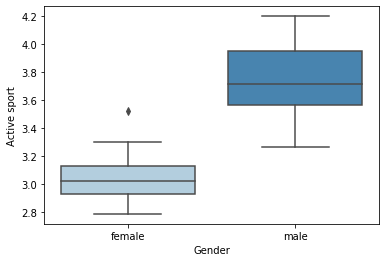

In [25]:
bp = sns.boxplot(x = 'Gender', y = 'Active sport', data=data_hobbies, palette="Blues")
# mean female = 2.96 , mean male = 3.88

In [26]:
# original data divided by active and less active
data_hobbies_female_plot = data.loc[data['Gender'] == 'female']
data_hobbies_male_plot = data.loc[data['Gender'] == 'male']

In [27]:
data_hobbies_female_plot.loc[data_hobbies_female_plot['Active sport'] <= 3, 'Sport active'] = 'not active' 
data_hobbies_female_plot.loc[data_hobbies_female_plot['Active sport'] > 3, 'Sport active'] = 'active'
data_hobbies_male_plot.loc[data_hobbies_male_plot['Active sport'] <= 3, 'Sport active'] = 'not active' 
data_hobbies_male_plot.loc[data_hobbies_male_plot['Active sport'] > 3, 'Sport active'] = 'active'

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
data_hobbies_female_plot1 = data_hobbies_female_plot.groupby(['Age','Sport active'], as_index=False).agg({'Number of siblings':'count'})
# data_hobbies_female_plot1

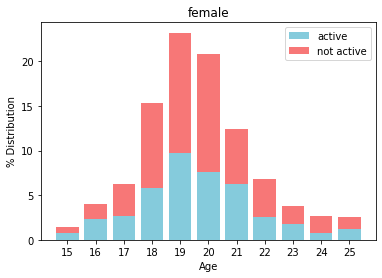

In [71]:
xf = data_hobbies_female_plot1['Age'].unique()
y1f = data_hobbies_female_plot1[data_hobbies_female_plot1['Sport active'] =='active']['Number of siblings']/556*100
y2f = data_hobbies_female_plot1[data_hobbies_female_plot1['Sport active'] =='not active']['Number of siblings']/556*100
plt.bar(xf, y1f, color='#85cbdc', label='active', width=0.8)
plt.bar(xf, y2f, bottom=y1f, label='not active', color='#f77777', width=0.8)
plt.title('female')
plt.xticks(xf)
plt.xlabel('Age')
plt.ylabel('% Distribution')
plt.legend(loc='best')
plt.savefig('Age_active_female.png', bbox_inches = 'tight', transparent = True)

In [64]:
data_hobbies_male_plot1 = data_hobbies_male_plot.groupby(['Age','Sport active'], as_index=False).agg({'Number of siblings':'count'})

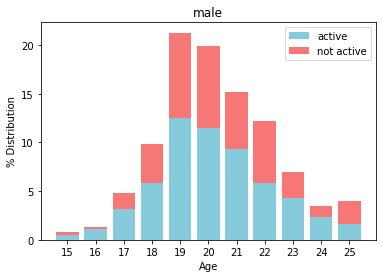

In [72]:
xm = data_hobbies_male_plot1['Age'].unique()
y1m = data_hobbies_male_plot1[data_hobbies_male_plot1['Sport active'] =='active']['Number of siblings']/376*100
y2m = data_hobbies_male_plot1[data_hobbies_male_plot1['Sport active'] =='not active']['Number of siblings']/376*100
plt.bar(xm, y1m, color='#85cbdc', label='active', width=0.8)
plt.bar(xm, y2m, bottom=y1m, label='not active', color='#f77777', width=0.8)
plt.title('male')
plt.xticks(xm)
plt.xlabel('Age')
plt.ylabel('% Distribution')
plt.legend(loc='best')
plt.locator_params(axis='y', nbins=5)
plt.savefig('Age_active_male.png', bbox_inches = 'tight', transparent = True)

##  Hypothesis testing

#### Paired t-test (a.k.a. dependent or correlated t-test). This type of t-test is to compare the samples of the same population (e.g. scores of different tests of students in the same class). scipy provides the ttest_re method to conduct paired t-test
Both types of t-tests return a number which is called the p-value. If p-value is below 0.05, we can confidently declare the null-hypothesis is rejected and the difference is significant. If p-value is between 0.05 and 0.1, we may also declare the null-hypothesis is rejected but we are not highly confident. If p-value is above 0.1 we do not reject the null-hypothesis.

In [32]:
def t_test_interests(s1, s2, interests=['Passive sport', 'Active sport', 'Adrenaline sports']):
    """Test means of a feature set of two samples
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of interests to test
    
    Returns:
        dict: a dictionary of t-test scores for each interest category where the interest category name is the key and the p-value is the value
    """
    results = {i:(stats.ttest_ind(s1[i],s2[i])[1]) for i in interests}    
    return results

###  Are there differences between two gender categories?

### Hypothesis 
H0: There is no difference between gender and being iterested in sport.

H1: There is a difference between gender.

In [33]:
# group in male and female
female = data_hobbies_interest.loc[data_hobbies_interest.Gender == 'female']
female = female.dropna() 
male = data_hobbies_interest.loc[data_hobbies_interest.Gender == 'male']
male = male.dropna() 

In [34]:
# t-test with t-test function
t_test_interests(female,male)

{'Passive sport': 3.1272221323933195e-05,
 'Active sport': 1.6897267089561704e-09,
 'Adrenaline sports': 4.414926982932572e-09}

#### Results
P-value is below 0.05, in all cases -> null-hypothesis is rejected and the difference is significant





###  Are differences between puberty age and age above?

### Hypothesis

H0: There is no difference in interest before and after puberty.

H1: There is a difference between these two age-groups.

In [35]:
# age - before and after puberty
before_p = data_hobbies_interest.loc[data_hobbies_interest.Age <= 19]
before_p = before_p.dropna() 
after_p = data_hobbies_interest.loc[data_hobbies_interest.Age >= 20]
after_p = after_p.dropna()
t_test_interests(before_p,after_p)

{'Passive sport': 0.8489194947201986,
 'Active sport': 0.936275615868045,
 'Adrenaline sports': 0.9070612440471701}

#### Results
P-value is above 0.05, in all cases -> null-hypothesis can't be rejected

### Are there differences in  smaller age groups by gender categories?

### Hypothesis (Age 15-16)

H0: There is no difference in interest in age group 15-16.

H1: There is a difference between these two age-groups.

In [36]:
# male and female and 15-16 year old
female1516 = data_hobbies[(data_hobbies['Gender'] == 'female') & (data_hobbies['Age'] <= 16)]
male1516 = data_hobbies[(data_hobbies['Gender'] == 'male') & (data_hobbies['Age'] <= 16)]
t_test_interests(female1516,male1516)

{'Passive sport': 0.0014103185874263366,
 'Active sport': 0.07297710783854185,
 'Adrenaline sports': 0.45398373798502645}

#### Results
P-value is not above 0.05, in 'Active sport' -> null-hypothesis can be rejected with 95% confidence (not with 99% confidence)

### Hypothesis (Age 17-18)
H0: There is no difference in interest in age group 17-18.

H1: There is a difference between these two age-groups.

In [37]:
# male and female and 17-18 year old
female1718 = data_hobbies[(data_hobbies['Gender'] == 'female') & (data_hobbies['Age'] >= 17 ) & (data_hobbies['Age'] <= 18)]
male1718 = data_hobbies[(data_hobbies['Gender'] == 'male') & (data_hobbies['Age'] >= 17) & (data_hobbies['Age'] <= 18)]
t_test_interests(female1718,male1718)

{'Passive sport': 0.8976917343489493,
 'Active sport': 0.10137442599272743,
 'Adrenaline sports': 0.11834407694041964}

#### Results
P-value is above 0.05, in all cases -> null-hypothesis can't be rejected

### Hypothesis (Age 19-20)
H0: There is no difference in interest in age group 19-20.

H1: There is a difference between these two age-groups.

In [38]:
# male and female and 19-20 year old
female1920 = data_hobbies[(data_hobbies['Gender'] == 'female') & (data_hobbies['Age'] >= 19 ) & (data_hobbies['Age'] <= 20)]
male1920 = data_hobbies[(data_hobbies['Gender'] == 'male') & (data_hobbies['Age'] >= 19) & (data_hobbies['Age'] <= 20)]
t_test_interests(female1920,male1920)

{'Passive sport': 0.013287343271375238,
 'Active sport': 0.0077741260015283895,
 'Adrenaline sports': 0.02873951335143883}

#### Results
P-value is above 0.05, in 'Active sport' -> null-hypothesis can be rejected (not highly confident) 
P-value is below 0.05, in two other categories -> null-hypothesis can be rejected

### Hypothesis (Age 21-22)
H0: There is no difference in interest in age group 21-22.

H1: There is a difference between these two age-groups.

In [39]:
# male and female and 21-22 year old
female2122 = data_hobbies[(data_hobbies['Gender'] == 'female') & (data_hobbies['Age'] >= 21 ) & (data_hobbies['Age'] <= 22)]
male2122 = data_hobbies[(data_hobbies['Gender'] == 'male') & (data_hobbies['Age'] >= 21) & (data_hobbies['Age'] <= 22)]
t_test_interests(female2122,male2122)

{'Passive sport': 0.35819906987851213,
 'Active sport': 0.2377178670585369,
 'Adrenaline sports': 0.21658670308959685}

#### Results
P-value is above 0.05, in all cases -> null-hypothesis can be rejected 

### Hypothesis (Age 23-25)
H0: There is no difference in interest in age group 23-25.

H1: There is a difference between these two age-groups.

In [40]:
# male and female and 23-25 year old
female2325 = data_hobbies[(data_hobbies['Gender'] == 'female') & (data_hobbies['Age'] >= 23 ) & (data_hobbies['Age'] <= 25)]
male2325 = data_hobbies[(data_hobbies['Gender'] == 'male') & (data_hobbies['Age'] >= 23) & (data_hobbies['Age'] <= 25)]
t_test_interests(female2325,male2325)

{'Passive sport': 0.1301496515969729,
 'Active sport': 0.031401005612040796,
 'Adrenaline sports': 0.0042250122116696785}

#### Results
P-value is below 0.05, in all cases -> null-hypothesis can't be rejected

### Dividing by active and not active Indviduals 

In [41]:
# original data divided by active and less active
active = data.loc[data['Active sport'] <= 2]
n_active = data.loc[data['Active sport'] >= 4]

In [42]:
# there are 211 active Individuals -> cat. 4&5 ---- Not interested 1-2-3-4-5 Very interested (integer)
active.shape

(301, 150)

In [43]:
# there are 301 not that active Individuals -> cat. 1&2 ---- Not interested 1-2-3-4-5 Very interested (integer)
n_active.shape

(449, 150)

### Correlation between risks and not active young people 

#### BMI calculation as possible indicator for risk 

In [44]:
data['BMI'] = round((data['Weight'])/(((data['Height'])/100)**2),2)

In [45]:
data.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,18.07
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,21.83
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats,21.63
3,5.0,3.0,2.0,1.0,1.0,1.0,1

In [46]:
data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,BMI
count,933.000000,934.000000,932.000000,931.000000,931.000000,929.000000,934.000000,933.000000,930.000000,933.000000,928.000000,932.000000,929.000000,930.000000,929.000000,929.000000,928.000000,929.000000,935.000000,931.000000,934.000000,935.000000,933.000000,933.000000,935.000000,934.000000,933.000000,933.000000,928.000000,932.000000,934.000000,934.000000,932.000000,935.000000,933.000000,933.000000,933.000000,931.000000,933.000000,930.000000,928.000000,931.000000,928.000000,931.000000,933.000000,935.000000,932.000000,932.00000,933.000000,930.000000,933.000000,935.000000,931.000000,923.00000,933.000000,930.000000,934.000000,934.000000,930.000000,929.000000,934.000000,933.000000,933.000000,933.000000,935.000000,934.000000,934.000000,932.000000,936.000000,933.000000,935.000000,935.000000,936.000000,933.000000,929.000000,933.000000,933.000000,932.000000,934.000000,930.000000,932.000000,935.000000,933.000000,931.000000,932.000000,935.000000,930.000000,932.000000,933.000000,931.00000,932.000000,933.000000,931.000000,936.000000,932.000000,930.000000,936.000000,935.000000,932.000000,935.000000,934.000000,934.000000,936.000000,933.000000,936.000000,933.000000,936.000000,932.000000,935.000000,932.000000,934.000000,930.000000,932.000000,934.000000,934.000000,935.000000,934.000000,933.000000,934.000000,933.000000,932.000000,932.000000,932.000000,932.000000,932.000000,933.000000,934.000000,933.000000,934.000000,934.000000,935.000000,933.000000,934.000000,936.000000,934.000000,936.000000,921.000000,920.000000,934.000000,911.000000
mean,4.743837,3.338330,3.125536,2.270677,2.119227,2.947255,2.761242,3.475884,3.777419,2.362272,2.466595,2.934549,2.772874,2.775269,3.146394,2.844995,2.828664,2.353068,2.113369,4.621912,2.791221,3.361497,4.509110,3.489818,3.125134,3.146681,3.764202,3.825295,3.623922,2.106223,3.547109,3.190578,3.142704,2.595722,2.309753,2.027867,4.175777,3.104189,2.633441,2.667742,2.179957,3.163265,3.068966,3.806660,2.505895,2.241711,2.677039,2.57618,2.250804,3.670968,2.448017,2.306952,1.885070,3.40520,3.279743,1.872043,2.355460,3.292291,3.213978,3.013994,4.572805,2.968917,3.349411,2.041801,1.952941,2.245182,2.605996,2.826180,3.016026,2.386924,2.558289,3.028877,2.811966,3.026795,3.053821,2.602358,3.041801,2.969

In [47]:
correlation = data.corr().unstack().sort_values().drop_duplicates()
print(correlation)

Happiness in life               Loneliness                       -0.445847
Life struggles                  Height                           -0.376024
Weight                          Life struggles                   -0.374426
Dangerous dogs                  Small - big dogs                 -0.373919
Loneliness                      Energy levels                    -0.350593
Changing the past               Happiness in life                -0.344618
Life struggles                  Cars                             -0.319769
Loneliness                      Number of friends                -0.319270
Reading                         Cars                             -0.310693
Weight                          Romantic                         -0.305483
New environment                 Fear of public speaking          -0.304606
Romantic                        Height                           -0.301018
Life struggles                  Action                           -0.299226
Pop                      

In [48]:
data_corr = data[['Active sport','Adrenaline sports','Passive sport','Life struggles','Decision making','Mood swings','Self-criticism','Loneliness','Getting angry','Healthy eating','PC','Fun with friends','Happiness in life','Spending on healthy eating','Energy levels','Interests or hobbies','Socializing','Internet','BMI']]
correlation = data_corr.corr()

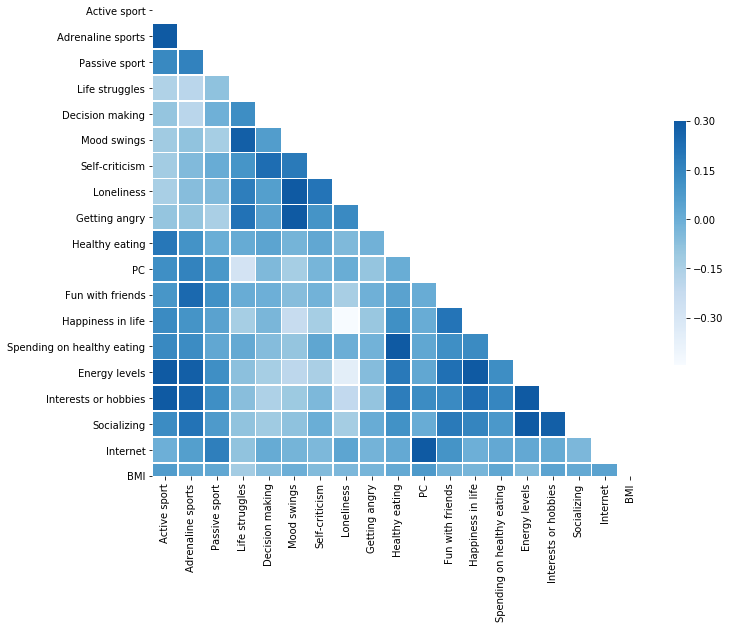

In [49]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap='Blues', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})